In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

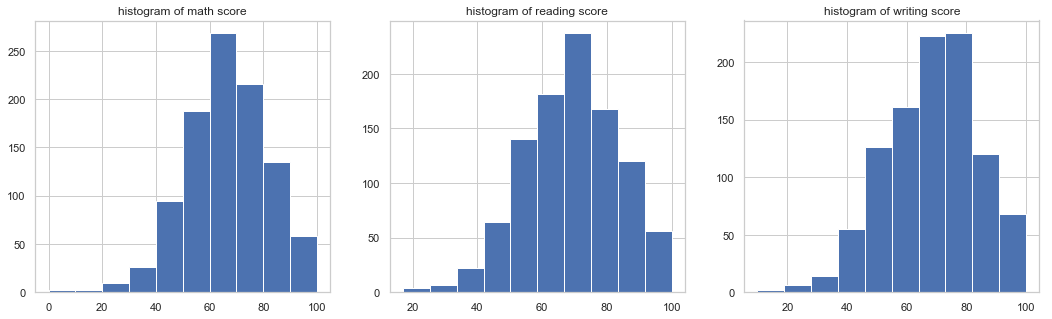

In [3]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(student_df["math score"])
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(student_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(student_df["writing score"])
plt.title("histogram of writing score")

plt.show()

In [4]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


They are not *quite* normal due to the maximum score of 100 being achieved far more frequently than some of the lowest scores.

In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [6]:
# boxcox will only take positive data, but there is at least 1 math score of 0...remove this!
student_df = student_df[student_df['math score'] > 0]

In [7]:
from scipy.stats import boxcox

math_boxcox = boxcox(student_df["math score"])
reading_boxcox = boxcox(student_df["reading score"])
writing_boxcox = boxcox(student_df["writing score"])

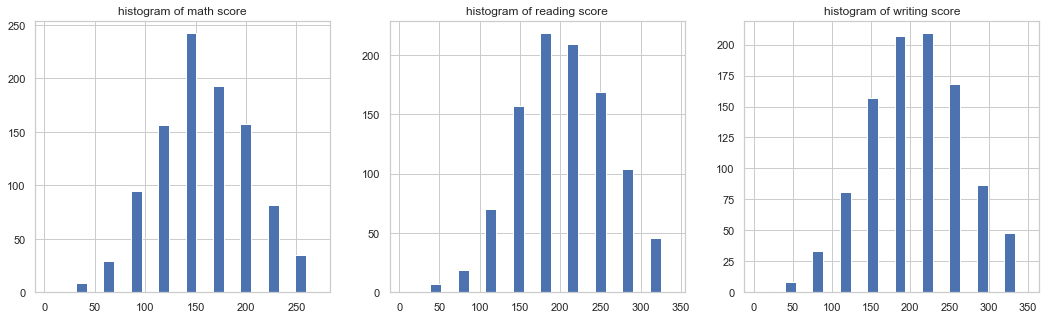

In [8]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing score")

plt.show()

In [9]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

ValueError: operands could not be broadcast together with shapes (2,) (999,) 